<a href="https://colab.research.google.com/github/gabriel-reis12/Preco-Pistao/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Project - Importing Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('Estudo.xlsx')

In [ ]:
df.head(5)

,Bruto,ext,Unnamed: 2,ext.1,retrabalho,Código - ITEM,PESO BRUTO,Tiny\nPESO SERRADO\nArred,Tiny\nPESO SERRADO,PESO USINADO,...,3.35,preço novo,Unnamed: 25,dif.,2.75,Preço Concorrente,Diff.1,Curva,Observação Lucas,regra
0,2020-A1,2000,sem alteração,2000,NaN,"P 2000 - 0,50",0.48,0.34,0.337,0.220,...,54.168495,56.2,0.0,-2.031505,44.466675,NaN,NaN,A,NaN,NaN
1,2020-A1,2000,sem alteração,2000,NaN,"P 2000 - 1,00",0.48,0.34,0.337,0.220,...,54.168495,56.2,0.0,-2.031505,44.466675,NaN,NaN,B,NaN,NaN
2,2020-A1,2000,sem alteração,2000,NaN,P 2000 - STD,0.48,0.34,0.337,0.220,...,54.168495,56.2,0.0,-2.031505,44.466675,NaN,NaN,B,NaN,NaN
3,2020-A3,2001,sem alteração,2001,NaN,"P 2001 - 0,50",0.42,0.31,0.310,0.224,...,52.540395,51.4,0.0,1.140395,43.130175,NaN,NaN,B,NaN,NaN
4,2020-A3,2001,sem alteração,2001,NaN,"P 2001 - 1,00",0.42,0.31,0.310,0.224,...,52.540395,51.4,0.0,1.140395,43.130175,NaN,NaN,B,NaN,NaN


In [ ]:
df = df.rename(columns={'Tiny\nPESO SERRADO': 'Peso'}) #renomear coluna peso

In [ ]:
df = df.rename(columns={'preço novo': 'Preco'}) #renomear coluna de preço

In [ ]:
df_limpo = df.dropna(subset=["Peso", "Preco"]) #limpar os NaN

##Viewing Data

In [ ]:
import matplotlib.pyplot as plt

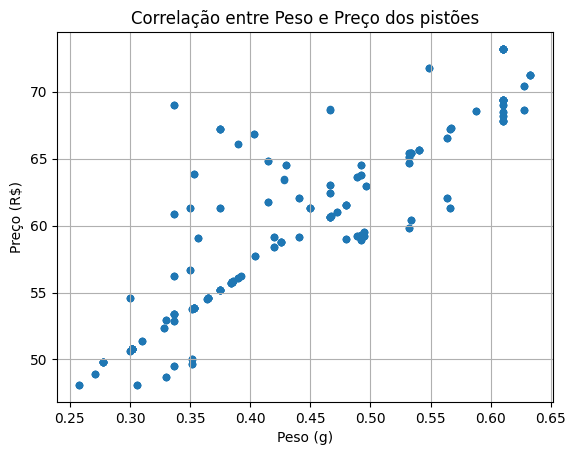

In [ ]:
df.plot(kind="scatter", x="Peso", y="Preco"); #correlated data :)
plt.title("Correlação entre Peso e Preço dos pistões")
plt.xlabel("Peso (g)")
plt.ylabel("Preço (R$)")
plt.grid(True)
plt.show()

####Muitos Outliers, irei utilizar RANSAC Regressor

##Importing SkLearn

In [ ]:
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [ ]:
modelo_base = LinearRegression() #puxar o modelo de previsão
modelo_ransac = RANSACRegressor(estimator=modelo_base) #puxar previsão sem outliers
x = df_limpo[["Peso"]] #definir coluna x como DF
y = df_limpo[["Preco"]] #definir coluna y como DF

In [ ]:
modelo_ransac.fit(x,y) #treinar o modelo com o fit

RANSACRegressor(estimator=LinearRegression())

##Digitar o Valor e receber o resultado

In [ ]:
try:
    valor_peso = float(input("Digite o peso do pistão desejado: "))
    preco_previsto = modelo_ransac.predict([[valor_peso]])[0][0] #resultado em reais
    print(f"O preço do pistão em reais é: R$ {preco_previsto:.2f}")
except ValueError:
    print("Por favor, digite um número válido para o peso.")


Digite o peso do pistão desejado: 0.500
O preço do pistão em reais é: R$ 62.79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(
